### Introduction to Data Science - Homework 5
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/*

Due: Friday, October 28, 11:59pm.

In this homework, you will (i) scrape happy data about happy hours in various restaurants and bars from a website and (ii) use classification tools to predict the popularity of online news.

## Your Data
Fill out the following information: 

*First Name:* Martin  
*Last Name:*   Raming
*E-mail:*   martin.raming@utah.edu
*UID:*  u0228111


## Part 1: Scrape SLC happy hour data

In this part, you'll explore happy hours close to Salt Lake City. Unfortunately, you'll probably have to drive a bit, since Utah doesn't do happy hours. Nevertheless, hopefully you'll get an idea for a great location for your next party!

You're going to scrape [The Happy Hour Finder](http://thehappyhourfinder.com/us_ut/salt-lake-city/).

### Task 1.1 Check whether you are permitted to scrape the data. 

Investigate the terms and services of the website and see whether there is a `robots.txt` file, and if so, if it permits you to scrape the website. Make sure you are allowed to scrape this website. Are you?

**Your determination:** TODO

### Task 1.2 Download the website

To avoid sending too many requests to the server download the html file using python and save it locally on your machine while you are developing. You should then only access the downloaded html.

The website allows us to specify a search. Ignore this and just scrape the default happy hours shown (today's happy hours). 

In [618]:
# imports and setup 

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (12, 12)
plt.style.use('ggplot')

In [517]:
# Your code here
address = 'http://thehappyhourfinder.com/us_ut/salt-lake-city/'
with urllib.request.urlopen(address) as response:
     html = response.read()
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <script type="text/javascript">
   window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(){}function o(t,e,n){return function(){return i(t,[(new Date).getTime()].concat(u(arguments)),e?null:this,n),e?void 0:this}}var i=t("handle"),a=t(2),u=t(3),c=t("ee").get("tracer"),f=NREUM;"undefined"==typeof window.newrelic&&(newrelic=f);var s=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit"],p="api-",l=p+"ixn-";a(s,function(t,e){f[e]=o(p+e,!0,"api")}),f.addPageAction=o(p+"addPageAction",!0),e.exports=newrelic,f.interaction=function(){return(new r).get()};var d=r.prototype={createTracer:function(t,e){var n={},r=this,o="function"==typeof e;return i

### Task 1.3 Create a dataframe
We want to know what day of the week and what time of the day is the most popular day for happy hours.
Create a pandas dataframe that includes the name of the bar, a binary entry for each day of the week indicating whether it has a happy hour that day or not.

Also add a link to the website in each row.

Hint: use css selectors to find the information you are looking for. You will also need to retrieve information from nested sites such as [this one](http://thehappyhourfinder.com/us_wy/jackson-hole/the-rose/). To finally get the data, you will need to work with strings. str.replace() and str.split() will help you here.

Your dataset in the end should look something like this: 

![data frame](data_frame.png)

In [518]:
# Your code here
places = {}
url = 'http://thehappyhourfinder.com'
for place in soup.find_all(class_="span8 hh-description"):
    link_tail = place.find("a").get("href")
    link = url+link_tail
    name = place.h5.get_text()
    places[name] = (link)
for link in places.keys():
    url2 = places[link]
    with urllib.request.urlopen(url2) as response:
           place_html = response.read()
    weekSoup = (BeautifulSoup(place_html,'html.parser'))





In [561]:
del places["Teton Pines Country Club"]



In [519]:
HappyPlace={}
week= {}



for link in places.keys():
    url2 = places[link]
    with urllib.request.urlopen(url2) as response:
        place_html = response.read()
    weekSoup = BeautifulSoup(place_html,'html.parser')        
    for name in weekSoup.find_all(class_="span8 left-column"):
        where = name.find("h1").get_text()
        for day in name.find_all(class_ = "dayly-hh row"):
            weekday  = day.strong.get_text()
            hours = day.find(class_='span8').get_text()
            week[weekday]= (hours)
        
    HappyPlace[where] = week
    week= {}   
    
        


    
    



In [737]:
ReducedData= {}
TexTime= {}
for bar in HappyPlace.keys():
    Times= {}
    data= HappyPlace[bar]
    for day in data.keys() :
        hour= []
        test_day = str(data[day])
        test_day=test_day.split()
        for times in test_day:
            time= times.replace(":","")
            
            if(time[len(time)-2] == "p" and time[len(time)-1]== 'm'):
                number = time.replace("pm","")
        
                if (len(number) ==4):
                    double = (number[0]+number[1])
            
                    hour.append(int(double)+12)
                else:
                    hour.append(int(number[0])+12)
            
            elif(time[len(time)-2] == "a" and time[len(time)-1]== 'm' ):
                number = time.replace("am","")
        
                if (len(number) ==4):
                    double = (number[0]+number[1])
                    if(double == "12"):
                        double= "24"
                    hour.append(int(double))
            
                else:
                    hour.append(int(number[0]))
        if(len(hour)>2):
            
            first_start= hour[0]
            first_end = hour[1] 
            first_hours = (np.arange(first_start,first_end))
            sec_start= hour[2]
            sec_end = hour[3] 
            sec_hours= (np.arange(sec_start,sec_end))
    
    
            HappyTime= list(first_hours)+list(sec_hours)
        else:
            start= hour[0]
            end = hour[1]
            HappyTime= (np.arange(start,end))
    
      
        Times[day]= HappyTime
        TexTime[day] = np.arange(0,24)
        
    ReducedData[bar]= Times
    ReducedData["Texas Roadhouse Restaurant"] = TexTime       
                    
        
        

ReducedData        



{'Ale House': {'Friday': [22, 23, 16, 17],
  'Monday': [22, 23, 16, 17],
  'Saturday': [22, 23, 16, 17],
  'Sunday': [22, 23, 16, 17],
  'Thursday': [22, 23, 16, 17],
  'Tuesday': [22, 23, 16, 17],
  'Wednesday': [22, 23, 16, 17]},
 'Applebees Neighborhood Grill': {'Friday': array([15, 16, 17]),
  'Monday': array([15, 16, 17]),
  'Saturday': array([15, 16, 17]),
  'Sunday': array([15, 16, 17]),
  'Thursday': array([15, 16, 17]),
  'Tuesday': array([15, 16, 17]),
  'Wednesday': array([15, 16, 17])},
 'Branding Iron Grill': {'Friday': array([15, 16]),
  'Monday': array([15, 16]),
  'Saturday': array([15, 16]),
  'Sunday': array([15, 16]),
  'Thursday': array([15, 16]),
  'Tuesday': array([15, 16]),
  'Wednesday': array([15, 16])},
 'Canyon Crest Dining & Event Center': {'Friday': array([15, 16, 17]),
  'Monday': array([15, 16, 17]),
  'Saturday': array([15, 16, 17]),
  'Sunday': array([15, 16, 17]),
  'Thursday': array([15, 16, 17]),
  'Tuesday': array([15, 16, 17]),
  'Wednesday': array

In [581]:
keys = sorted(places)
links= []


for link in keys:
    
    
    links.append(places[link])
print(len(links))
print(len(ReducedData))

19
19


In [806]:


df = (DataFrame(ReducedData)).T

df["Link"]= links
df= df.reset_index()
df.rename(columns = {"index":"Name"},inplace=True)

#df[["Friday","Monday"]]= df[["Monday","Tuesday","Wednesday","Thursday","Friday","Sunday","Saturday"]]
df

ValueError: Columns must be same length as key

### Task 1.4 Find popular days
What day of the week is the most popular for a happy hours? Create a bar chart showing how many establishments have happy hours each day of the week. Try to explain any pattern in the chart. 

        Days count unique                   top freq
1     Friday    18     18  [11, 12, 13, 14, 15]    1
2     Monday    18     18  [11, 12, 13, 14, 15]    1
3   Saturday    17     17              [16, 17]    1
4     Sunday    15     15              [16, 17]    1
5   Thursday    19     19  [11, 12, 13, 14, 15]    1
6    Tuesday    18     18  [11, 12, 13, 14, 15]    1
7  Wednesday    19     19  [11, 12, 13, 14, 15]    1


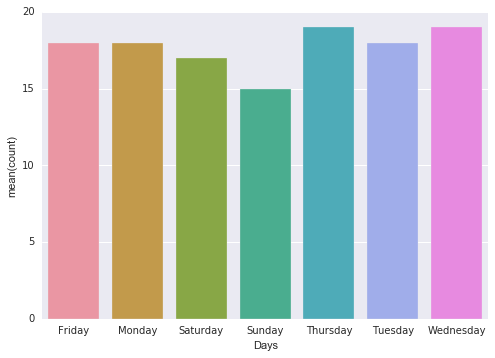

In [661]:
# Your code here
from ggplot import *
import seaborn as sns
opData = df.describe()
PlotData = opData.T
PlotData= PlotData.reset_index()
PlotData = PlotData.drop(0)
PlotData = PlotData.drop(8)

PlotData.rename(columns = {"index":"Days"},inplace=True)
print(PlotData)
p = ggplot( aes(x = "Days", weight = 'count'),PlotData) + geom_bar(stat="count") 
p
ax = sns.barplot(x="Days",y = "count", data=PlotData)

,Days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Friday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]","[16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]",NaN,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
1,Monday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]",NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
2,Saturday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]",NaN,"[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]",[],"[16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]",NaN,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
3,Sunday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]",NaN,"[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]",NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]",NaN,"[10, 11, 12, 13, 14, 15, 16]"
4,Thursday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]","[18, 19, 20, 16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
5,Tuesday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]",NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
6,Wednesday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]","[16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"


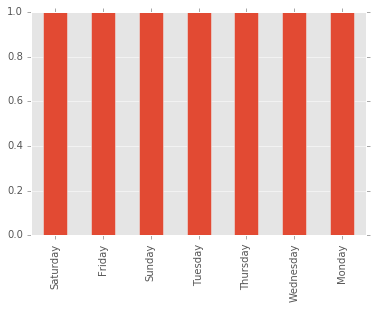

In [653]:
PlotData = df.T
PlotData = PlotData.drop("Name")
PlotData = PlotData.drop("Link")
PlotData= PlotData.reset_index()
PlotData.rename(columns = {"index":"Days"},inplace=True)

PlotData["Days"].value_counts().plot(kind='bar');
PlotData


### Task 1.5 Find popular times

Plot a histogram of happy hour times during the week, and a second histogram for happy hour times on the weekend. What time of the day is the most popular for a happy hour? Is there a difference between weekdays and weekends?

In [676]:
# Your code here
Pop_times_data = DataFrame(ReducedData)
Pop_times_data
Pop_times= Pop_times_data.reset_index()
Pop_times.rename(columns = {"index":"Days"},inplace=True)
Pop_times
#grouped = Pop_times.group_by("Days")

#sns.distplot(Pop_times["Days"])
    

,Days,Ale House,Applebees Neighborhood Grill,Branding Iron Grill,Canyon Crest Dining & Event Center,Lucky 13 Pizza,Nanis Cucina Italiana,P.F. Chang's China Bistro,Pinky G's Pizzeria,Pizzeria Caldera,Rendezvous Bistro,Silver Dollar Bar & Grill (Wort Hotel),Snake River Brewery,Tavern at Bown Crossing,Teton Pines Lounge,Texas Roadhouse Restaurant,The Rose,Town Square Tavern,Trap Bar,Vom FASS
0,Friday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]","[16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]",NaN,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
1,Monday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]",NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
2,Saturday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]",NaN,"[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]",[],"[16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]",NaN,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
3,Sunday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]",NaN,"[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]",NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]",NaN,"[10, 11, 12, 13, 14, 15, 16]"
4,Thursday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]","[18, 19, 20, 16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
5,Tuesday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]",NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"
6,Wednesday,"[22, 23, 16, 17]","[15, 16, 17]","[15, 16]","[15, 16, 17]","[16, 17]","[21, 17, 18]","[15, 16, 17]","[11, 12, 13, 14, 15]","[16, 17]",[17],"[16, 17, 18]","[16, 17]","[16, 17]","[16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 18, 19]","[19, 20]","[15, 16, 17]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]"


In [778]:
Data = df


#Data.rename(columns = {"index":"Days"},inplace=True) 
weekday= []
for time in Data['Friday']:
    times = [time]
    weekday.append(times)
weekday

[[[22, 23, 16, 17]],
 [array([15, 16, 17])],
 [array([15, 16])],
 [array([15, 16, 17])],
 [array([16, 17])],
 [[21, 17, 18]],
 [array([15, 16, 17])],
 [array([11, 12, 13, 14, 15])],
 [array([16, 17])],
 [array([17])],
 [array([16, 17, 18])],
 [array([16, 17])],
 [array([16, 17])],
 [array([16, 17])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23])],
 [array([17, 18, 19])],
 [array([19, 20])],
 [nan],
 [array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])]]

In [805]:
pl = Data['Friday'].tolist()
t=[]
for time in pl:
    times = np.asarray(time)
    t.append(times)
t    

[array([22, 23, 16, 17]),
 array([15, 16, 17]),
 array([15, 16]),
 array([15, 16, 17]),
 array([16, 17]),
 array([21, 17, 18]),
 array([15, 16, 17]),
 array([11, 12, 13, 14, 15]),
 array([16, 17]),
 array([17]),
 array([16, 17, 18]),
 array([16, 17]),
 array([16, 17]),
 array([16, 17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([17, 18, 19]),
 array([19, 20]),
 array(nan),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])]

In [682]:
df.values

array([['Ale House', [22, 23, 16, 17], [22, 23, 16, 17], [22, 23, 16, 17],
        [22, 23, 16, 17], [22, 23, 16, 17], [22, 23, 16, 17],
        [22, 23, 16, 17],
        'http://thehappyhourfinder.com/us_co/grand-junction/ale-house/'],
       ['Applebees Neighborhood Grill', array([15, 16, 17]),
        array([15, 16, 17]), array([15, 16, 17]), array([15, 16, 17]),
        array([15, 16, 17]), array([15, 16, 17]), array([15, 16, 17]),
        'http://thehappyhourfinder.com/us_co/grand-junction/applebees-neighborhood-grill-259/'],
       ['Branding Iron Grill', array([15, 16]), array([15, 16]),
        array([15, 16]), array([15, 16]), array([15, 16]), array([15, 16]),
        array([15, 16]),
        'http://thehappyhourfinder.com/us_wy/alta/branding-iron-grill/'],
       ['Canyon Crest Dining & Event Center', array([15, 16, 17]),
        array([15, 16, 17]), array([15, 16, 17]), array([15, 16, 17]),
        array([15, 16, 17]), array([15, 16, 17]), array([15, 16, 17]),
        'http:

## Part 2: Classification

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. The dataset is described on and can be downloaded from the 
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
Use the pandas.read_csv() function to import the dataset.

To use the Python library [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 

Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [ ]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [ ]:
# Your code here


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [ ]:
# Your code here


### Task 2.3 Classification using k-NN

Develop a k-NN classification model the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [ ]:
# Your code here


### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data.

*Hint:* SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 5,000 articles. 

In [ ]:
# Your code here


### Task 2.5 Classification using decision trees

Develop a decision tree machine classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [ ]:
# Your code here


### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+  Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** TODO
1. 
+ 
+ 
+ 